In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
data = pd.read_csv('gdrive/MyDrive/data/cover_data.csv')
#print(data.shape[1])
#print(data.describe,data.dtypes)
#There are 55 columns including the class label which we want to predict.
#So there are 54 sets of features and 1 set of labels.
#All the data has type int64 so there is no need for get_dummies or similar.
#The labels are discrete integers, so this is a classification problem.

In [ ]:
my_features = data.iloc[:,0:-1]
my_labels = data.iloc[:,-1]
my_labels = my_labels - 1
#This gives us our features and labels.
#Need to take 1 away from every entry in order for to_categorical to generate the right number of one-hot encodings

In [ ]:
features_train, features_test, labels_train, labels_test = train_test_split(my_features, my_labels, test_size = 0.2, random_state = 42)
#Splitting and shuffling of features and labels into a 80/20 ratio.

In [ ]:
labels_train_1 = tf.keras.utils.to_categorical(labels_train, dtype = 'int64', num_classes = 7)
labels_test_1 = tf.keras.utils.to_categorical(labels_test, dtype = 'int64', num_classes = 7)
#Transforming the labels into categorical data.

In [ ]:
ct = ColumnTransformer([('normalize', StandardScaler(), my_features.columns)])
features_train_norm = ct.fit_transform(features_train)
features_test_norm = ct.transform(features_test)
#Normalizing the features of the data.

In [ ]:
features_train_norm_1 = pd.DataFrame(features_train_norm, columns = features_train.columns)
features_test_norm_1 = pd.DataFrame(features_test_norm, columns = features_test.columns)
#Converting the normalized data back into a pandas dataframe.

In [ ]:
model = Sequential()
#Making the model.

model.add(tf.keras.layers.InputLayer(input_shape=(my_features.shape[1],)))
#Model input layer. Input shape corresponds to the number of features (columns) as opposed to rows.

model.add(Dense(54, activation = 'relu'))
model.add(Dense(54, activation = 'relu'))
#Adding 2 hidden layers.

model.add(Dense(7, activation = 'softmax'))
#Final output layer. There are 7 labels to predict and the activation is softmax as this is a classification problem.

opt = Adam(learning_rate = 0.001)
loss_c = tf.keras.losses.CategoricalCrossentropy()

model.compile(loss = loss_c, optimizer = opt, metrics = ['accuracy'] )
#Compiling the model with appropriate arguments.

stop = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10)
#Getting the model to stop early if it reaches a minimum befor the end of the epochs.

In [ ]:
history = model.fit(features_train_norm_1, labels_train_1, epochs = 50, batch_size = 32, validation_split = 0.2, callbacks = [stop])
#Fitting the model using 20% of the data as validation data.

Epoch 1/50
11621/11621 [==============================] - 21s 2ms/step - loss: 0.5616 - accuracy: 0.7603 - val_loss: 0.4905 - val_accuracy: 0.7917
Epoch 2/50
11621/11621 [==============================] - 19s 2ms/step - loss: 0.4641 - accuracy: 0.8029 - val_loss: 0.4473 - val_accuracy: 0.8077
Epoch 3/50
11621/11621 [==============================] - 19s 2ms/step - loss: 0.4280 - accuracy: 0.8192 - val_loss: 0.4037 - val_accuracy: 0.8319
Epoch 4/50
11621/11621 [==============================] - 20s 2ms/step - loss: 0.4060 - accuracy: 0.8305 - val_loss: 0.3966 - val_accuracy: 0.8353
Epoch 5/50
11621/11621 [==============================] - 20s 2ms/step - loss: 0.3907 - accuracy: 0.8374 - val_loss: 0.3791 - val_accuracy: 0.8413
Epoch 6/50
11621/11621 [==============================] - 19s 2ms/step - loss: 0.3792 - accuracy: 0.8433 - val_loss: 0.3705 - val_accuracy: 0.8439
Epoch 7/50
11621/11621 [==============================] - 19s 2ms/step - loss: 0.3697 - accuracy: 0.8464 - val_loss: 0

In [ ]:
loss, acc = model.evaluate(features_test_norm_1, labels_test_1, verbose = 0)
print(loss,acc)
#Final values of loss and accuracy on the test set.

0.285286545753479 0.8843661546707153


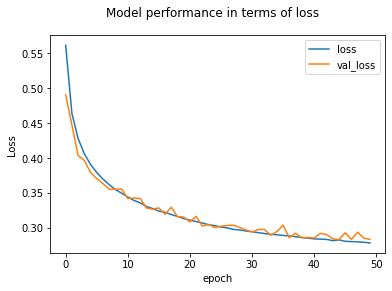

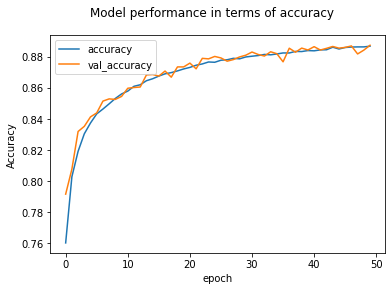

In [ ]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.suptitle("Model performance in terms of loss")
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()
#Plot of the loss throughout the training.

plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.suptitle("Model performance in terms of accuracy")
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.show()
#Plot of the accuracy throughout the training.

In [ ]:
Y_pred = model.predict(features_test_norm)
y_pred = np.argmax(Y_pred, axis=1)
cm = confusion_matrix(labels_test, y_pred)
print(cm)
#A printout of the confusion matrix.

[[37739  4382     7     0    24     8   397]
 [ 4829 51202   130     1   178   113    47]
 [    7   391  6281   106    28   308     0]
 [    0     0    89   401     0    36     0]
 [   86   797    33     0  1067    12     0]
 [   11   332   688    34     5  2419     0]
 [  283    74     0     0     1     0  3657]]


In [ ]:
print(classification_report(labels_test, y_pred))
#Precision, recall, and f1 scores for each class.

              precision    recall  f1-score   support

           0       0.88      0.89      0.88     42557
           1       0.90      0.91      0.90     56500
           2       0.87      0.88      0.88      7121
           3       0.74      0.76      0.75       526
           4       0.82      0.53      0.65      1995
           5       0.84      0.69      0.76      3489
           6       0.89      0.91      0.90      4015

    accuracy                           0.88    116203
   macro avg       0.85      0.80      0.82    116203
weighted avg       0.88      0.88      0.88    116203

